## Grundläggande exempel på Pandas

Den här anteckningsboken kommer att guida dig genom några mycket grundläggande koncept i Pandas. Vi börjar med att importera typiska bibliotek för datavetenskap:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serier

Serier är som en lista eller en 1D-array, men med index. Alla operationer är indexjusterade.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


En av de vanligaste användningarna av serier är **tidsserier**. I tidsserier har index en speciell struktur - vanligtvis ett intervall av datum eller tidpunkter. Vi kan skapa ett sådant index med `pd.date_range`.

Anta att vi har en serie som visar mängden produkter som köps varje dag, och vi vet att vi varje söndag också behöver ta en vara för oss själva. Så här kan vi modellera det med hjälp av serier:


Length of index is 366


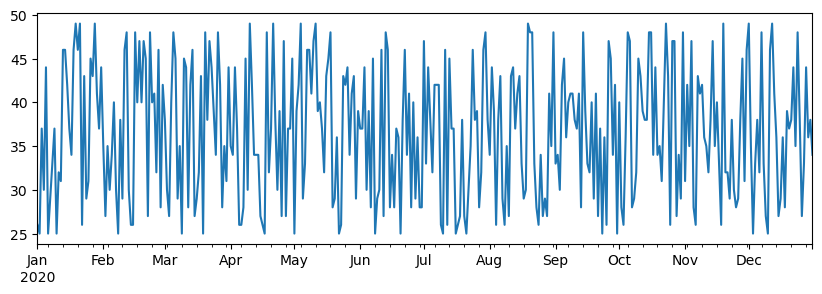

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Som du kan se har vi problem här, eftersom i den veckovisa serien betraktas icke nämnda dagar som saknade (`NaN`), och att lägga till `NaN` till ett tal ger oss `NaN`. För att få korrekt resultat behöver vi ange `fill_value` när vi lägger till serier:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


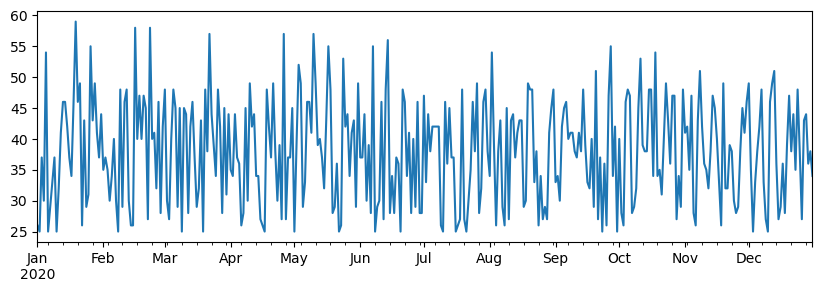

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

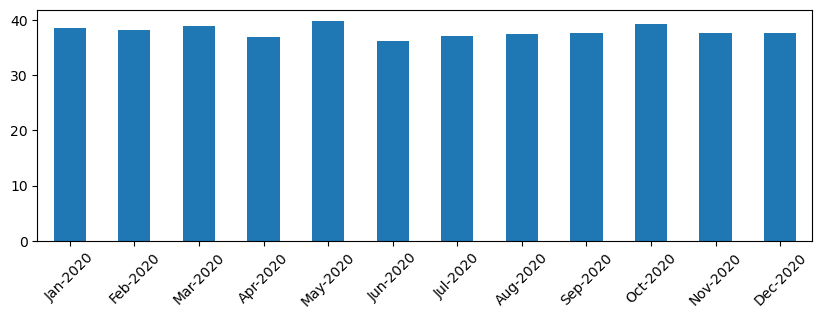

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

En dataframe är i grunden en samling av serier med samma index. Vi kan kombinera flera serier tillsammans till en dataframe. Givet serierna `a` och `b` som definierats ovan:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Vi kan också använda Series som kolumner och ange kolumnnamn med hjälp av en ordbok:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Samma resultat kan uppnås genom att transponera (och sedan byta namn på kolumnerna för att matcha det tidigare exemplet):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Att välja kolumner** från DataFrame kan göras så här:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Välja rader** baserat på filteruttryck:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Sättet det fungerar på är att uttrycket `df['A']<5` returnerar en boolesk serie, som indikerar om uttrycket är `True` eller `False` för varje element i serien. När serien används som ett index, returnerar den en delmängd av raderna i DataFrame. Därför är det inte möjligt att använda godtyckliga Python-booleska uttryck, till exempel att skriva `df[df['A']>5 and df['A']<7]` skulle vara fel. Istället bör du använda den speciella `&`-operationen på booleska serier:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

Skapa nya beräkningsbara kolumner. Vi kan enkelt skapa nya beräkningsbara kolumner för vår DataFrame genom att använda intuitiva uttryck. Koden nedan beräknar avvikelsen för A från dess medelvärde.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Det som faktiskt händer är att vi beräknar en serie och sedan tilldelar denna serie till vänstra sidan, vilket skapar en annan kolumn.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Att välja rader baserat på siffror** kan göras med hjälp av `iloc`-konstruktionen. Till exempel, för att välja de första 5 raderna från DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Gruppering** används ofta för att få ett resultat liknande *pivottabeller* i Excel. Anta att vi vill beräkna medelvärdet av kolumnen `A` för varje givet nummer av `LenB`. Då kan vi gruppera vår DataFrame efter `LenB` och anropa `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Om vi behöver beräkna medelvärdet och antalet element i gruppen, kan vi använda en mer komplex `aggregate`-funktion:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Utskrift och Visualisering

En data scientist måste ofta utforska data, och därför är det viktigt att kunna visualisera den. När en DataFrame är stor vill vi många gånger bara försäkra oss om att vi gör allting rätt genom att skriva ut de första raderna. Detta kan göras genom att anropa `df.head()`. Om du kör det från Jupyter Notebook kommer det att skriva ut DataFrame i ett snyggt tabellformat.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Vi har också sett användningen av funktionen `plot` för att visualisera vissa kolumner. Även om `plot` är mycket användbar för många uppgifter och stöder många olika typer av diagram via parametern `kind=`, kan du alltid använda det rena biblioteket `matplotlib` för att skapa något mer komplext. Vi kommer att gå igenom datavisualisering i detalj i separata kurslektioner.


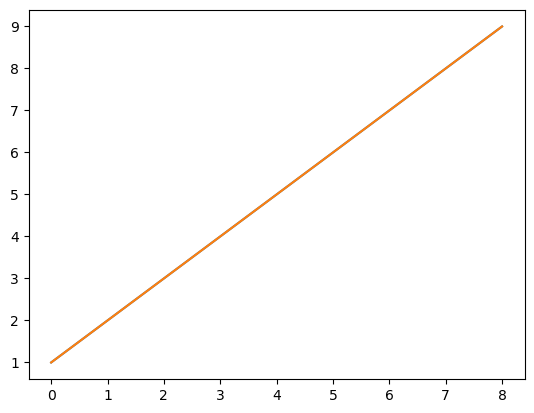

In [61]:
df['A'].plot()
plt.show()

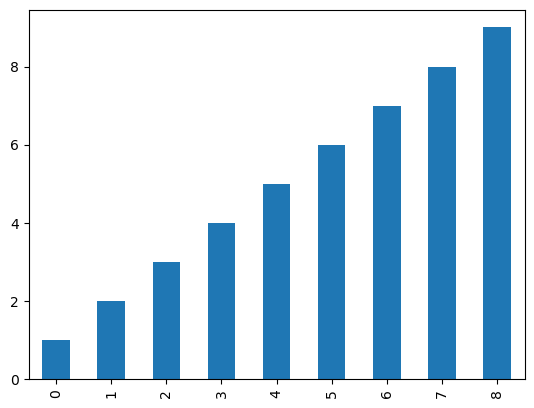

In [63]:
df['A'].plot(kind='bar')
plt.show()

Den här översikten täcker de viktigaste koncepten i Pandas, men biblioteket är mycket omfattande och det finns inga gränser för vad du kan göra med det! Låt oss nu använda denna kunskap för att lösa ett specifikt problem.



---

**Ansvarsfriskrivning**:  
Detta dokument har översatts med hjälp av AI-översättningstjänsten [Co-op Translator](https://github.com/Azure/co-op-translator). Även om vi strävar efter noggrannhet, vänligen notera att automatiska översättningar kan innehålla fel eller felaktigheter. Det ursprungliga dokumentet på dess originalspråk bör betraktas som den auktoritativa källan. För kritisk information rekommenderas professionell mänsklig översättning. Vi ansvarar inte för eventuella missförstånd eller feltolkningar som uppstår vid användning av denna översättning.
